In [128]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import math
from pydoc import help
from scipy.stats.stats import pearsonr

Data relationship information assesment tools given below-

In [2]:
def standard_deviation(data,bias=0):
  x= data
  observations = float(len(data))
  std_dev = np.sqrt(np.sum((x-np.mean(x))**2)/observations-min(bias,1))
  return std_dev

In [3]:
def z_score(data):
  x = data
  zscore = (x-np.mean(x))/standard_deviation(x)
  return zscore


In [254]:
def correlation(var1,var2,bias =0):
  x= var1
  y=var2
  n = float(len(var1))
  correlation = np.sum((x-np.mean(x))*(y-np.mean(y)))/(n-min(bias,1))*(standard_deviation(x)*standard_deviation(y))
  return correlation

In [125]:
def SumErrorSquared(var1,bias=0) :
  Y=var1
  observations= float(len(var1))
  mean_sum_squared_error = np.sum((Y-np.mean(Y))**2)
  regr_sum_squared_error = np.sum((Y-fitted_values)**2)#/(observations-min(bias,1))
  ErrorRatio = (mean_sum_squared_error-regr_sum_squared_error)/mean_sum_squared_error #pearson-correlation
  return [np.sqrt(mean_sum_squared_error),np.sqrt(regr_sum_squared_error),ErrorRatio]

Solving regression problem with Matrix operations where the independent variable is represented as a matrix always and the target variable will always be considered as a vector.

In [174]:
def inverse_matrix(X,y,pseduo=False):
   n =len(X)
   if type(X)!=np.ndarray:
        X=np.array(X.to_list())
   X = X.reshape(n,1)
   Xb = np.column_stack((X,np.ones(n)))
   y = y.values
   if pseduo:
        return np.dot(np.linalg.pinv(np.dot(Xb.T,Xb)),np.dot(Xb.T,y))
   else:
        return np.dot(np.linalg.inv(np.dot(Xb.T,Xb)),np.dot(Xb.T,y))
    

In [202]:
def normal_equation(X,y):
        n =len(X)
        X=np.array(X.to_list())
        X=X.reshape(n,1)
        print(X)
        Xb = np.column_stack((X,np.ones(n)))
        y = y.values
        return np.linalg.solve(np.dot(Xb.T,Xb),np.dot(Xb.T,y))

In [255]:
def fitted_values(X):
        Eq = normal_equation(X,Y)
        Y_hat= np.multiply(Eq[0],X)+Eq[1]
        return Y_hat

Plotting functions to visualize data.

In [132]:
def scatter_plot(X,Y):
    s= plt.plot(X,Y,'bp')
    return plt.grid()

In [123]:
def residual_square_error_plot(X,Y):
    var1 =Y
    residuals = var1-fitted_values
    normalized_res = z_score(residuals)
    residual_scatter_plot = plt.plot(X,normalized_res,'bp')
    mean_line = plt.plot([int(X.min()),round(X.max(),0)],[0,0],'-',linewidth=2)
    upper_line = plt.plot([int(X.min()),round(X.max(),0)],[3,3],'--',linewidth=2)
    lower_line = plt.plot([int(X.min()),round(X.max(),0)],[-3,-3],'--',linewidth=2)
    return plt.grid()

In [236]:
def fitted_value_plot(X,Y):
    s =plt.plot(X,Y,'bp')
    v_fit = fitted_model.predict(X)
    X=X.values
    rng1,rng2 = [np.min(X),np.max(X)],[np.min(v_fit),np.max(v_fit)]
    fit_line = plt.plot([int(rng1[0]),int(rng1[1])],[int(rng2[0]),int(rng2[1])],'--',linewidth=2)
    return plt.grid()

In [231]:
def normal_distribution(X):
    plt.hist(X,bins=50,density=True,color='c')
    xmin,xmax=plt.xlim()
    rng = np.linspace(xmin,xmax,len(X))
    sigma=standard_deviation(X)
    norm_pdf= norm.pdf(rng,X.mean(),sigma)
    plt.plot(rng,norm_pdf,'k',linewidth = 2)
    return plt.grid()

In [244]:
dataset = pd.read_csv('diamonds.csv')
X=dataset['carat']
Y=dataset['price']

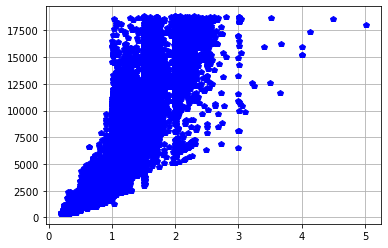

In [8]:
scatter_plot(X,Y)

In [243]:
from statsmodels.api import add_constant
Xb=add_constant(X)
lin_regr = sm.OLS(Y,Xb)
fitted_model = lin_regr.fit()
fitted_model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        02:18:50   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.000   -2281.949   -2230.772
carat       7756.4256     14.067    551.408      0.000    7728.855    7783.996
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
betas = fitted_model.params
fitted_values = fitted_model.predict(X)

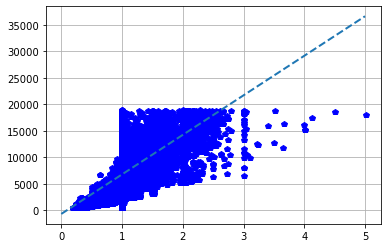

In [241]:
fitted_value_plot(X,Y)

In [237]:
SumErrorSquared(Y,fitted_values)

[926538.2536719118, 359646.6257282055, 0.8493305264354857]

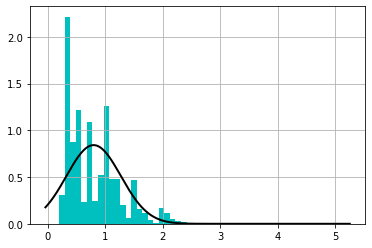

In [247]:
normal_distribution(X)


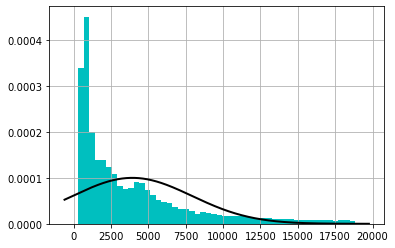

In [248]:
normal_distribution(Y)


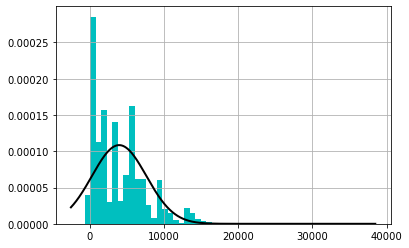

In [249]:
normal_distribution(fitted_values)

In [238]:
SumErrorSquared(Y)

[926538.2536719118, 359646.6257282055, 0.8493305264354857]

In [245]:
print((pearsonr(X,Y)[0])**2)

0.849330526435486


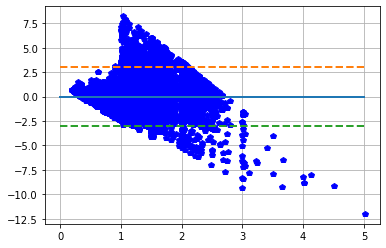

In [250]:
residual_square_error_plot(X,Y)

In [203]:
normal_equation(X,Y)

[[0.23]
 [0.21]
 [0.23]
 ...
 [0.7 ]
 [0.86]
 [0.75]]


array([ 7756.42561797, -2256.36058005])

In [253]:
fitted_model.predict(Xb)

0        -472.382688
1        -627.511200
2        -472.382688
3          -6.997151
4         148.131362
            ...     
53935    3328.265865
53936    3328.265865
53937    3173.137353
53938    4414.165451
53939    3560.958633
Length: 53940, dtype: float64

In [198]:
inverse_matrix(X,Y)

array([ 7756.42561797, -2256.36058005])

In [251]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        02:23:47   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.000   -2281.949   -2230.772
carat       7756.4256     14.067    551.408      0.000    7728.855    7783.996
==============================================================================
Omnibus:                    14025.341   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153030.525
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                      11.035   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'pwd' is not recognized as an internal or external command,
operable program or batch file.
